# Exploratory Data Analysis

Here we look at the dataset and try to figure out which features could prove to be relevant in predicting the survival of a given passenger.


## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## First Look at the Data

In [3]:
df = pd.read_csv("train.csv")
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Promising Avenues

Some thoughts worth exploring:

- Pclass: Passenger class could perhaps dictate that more first class passengers surivived than other classes.
- Name: Has class markers such as Noble and army/navy. Extract titles from name and make categorical variable?
- Sex: If the "Women and children first!" scene from the movie was not complete fiction then there is a greater likelihood of survival if one is a woman.
- Age: Young children probably got a place on the lifeboats ahead of teenagers and older people.
- SipSp: Number of siblings and/or spouse onboard. More likely to be saved if someone else is onboard who also cares about your survival.
- Parch: Same reason as siblings and spouses but perhaps a stronger correlation due to a stronger/more direct relationship.
- Ticket: Some tickets begin with letters, probably denoting the section the of the cabins. Maybe some sections are more likely to survive.
- Fare: The higher the fare paid, the richer the person. Richer people more likely to survive?
- Cabin: Some cabin sections more likely to survive?
- Embarked: I don't think this should have any bearing on survival. There is probably some random correlation which is best ignored.

## Passenger Class

In [49]:
df["Pclass"].isna().sum()


0

No null values in this column.

In [13]:
df.groupby(["Pclass"])["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Here, we can clearly see that our assumption that the richer people in first class had a much higher survival rate than that of other classes. 

Note - When we take the mean of a binary coded variable like "Survived" we essentially get the percentage or fraction of "True"/"1" 
responses in the data.

The graph below gives us a visual representation of the survival rate of a passenger in first class being more than double that of one in third class.

<AxesSubplot:xlabel='Pclass', ylabel='Survival Rate'>

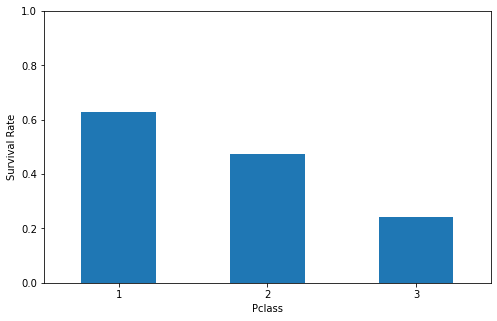

In [27]:
df.groupby(["Pclass"])["Survived"].mean().plot.bar(rot = 0, figsize = (8, 5), ylim=(0, 1), ylabel="Survival Rate")

## Name

In [50]:
df["Name"].isna().sum()

0

In [28]:
df["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

The name has status markers which indicate the passenger as a member of Noble or the armed forces etc. We can extract these and use these as features.

In [31]:
df["Name"][0]

def extract_title(name):
    return name.split(",")[1].split(".")[0].strip()

extract_title(df["Name"][0])

'Mr'

In [33]:
df["Name"].apply(extract_title).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [34]:
# Make a dictionary from all the unique titles in the dataset which maps to the status of the passenger.

title_dict = {
    "Mr": "Commoner",
    "Mrs": "Commoner",
    "Miss": "Commoner",
    "Master": "Commoner",
    "Don": "Noble",
    "Rev": "Serviceman",
    "Dr": "Serviceman",
    "Mme": "Commoner",
    "Ms": "Commoner",
    "Major": "Serviceman",
    "Lady": "Noble",
    "Sir": "Noble",
    "Mlle": "Commoner",
    "Col": "Serviceman",
    "Capt": "Serviceman",
    "the Countess": "Noble",
    "Jonkheer": "Noble",
}

In [37]:
def assign_social_status(title):
    return title_dict[title]

In [38]:
df["SocialStatus"] = df["Name"].apply(extract_title)
df["SocialStatus"] = df["SocialStatus"].apply(assign_social_status)

In [42]:
df.groupby(["SocialStatus"])["Survived"].mean()

SocialStatus
Commoner      0.384793
Noble         0.600000
Serviceman    0.277778
Name: Survived, dtype: float64

We can clearly see here that Nobles have a higher rate of survival than Commoners and Servicemen have the lowest rate amongst all the classes. The ratios are visualised in the chart below.

<AxesSubplot:xlabel='SocialStatus', ylabel='Survival Rate'>

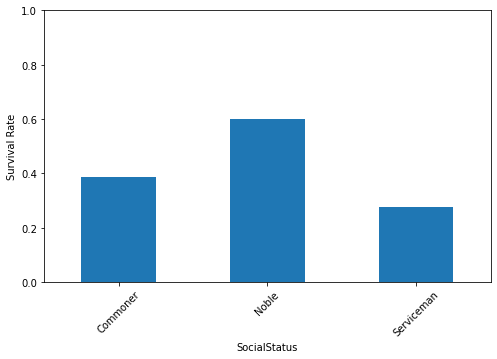

In [45]:
df.groupby(["SocialStatus"])["Survived"].mean().plot.bar(rot=45, figsize = (8, 5), ylim=(0, 1), ylabel="Survival Rate")

## Sex

In [52]:
df["Sex"].isna().sum()

0

In [47]:
df.groupby(["Sex"])["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Women have a much higher rate of survival than men.

<AxesSubplot:xlabel='Sex', ylabel='Survival Rate'>

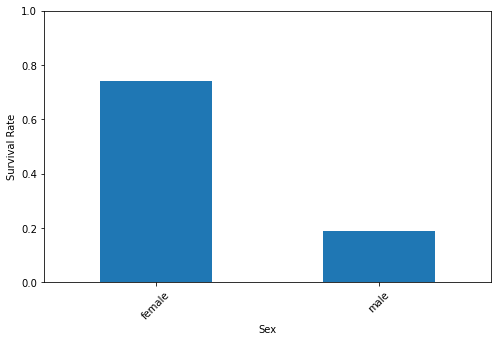

In [53]:
df.groupby(["Sex"])["Survived"].mean().plot.bar(rot=45, figsize = (8, 5), ylim=(0, 1), ylabel="Survival Rate")

## Age

In [59]:
df["Age"].isna().sum()

177

Quite a few null values. Need to fill them in somehow.

<AxesSubplot:ylabel='Frequency'>

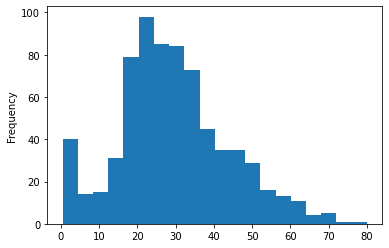

In [56]:
df["Age"].plot.hist(bins=20)

In [58]:
df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [79]:
pd.cut(df["Age"], 7)

0      (11.789, 23.157]
1      (34.526, 45.894]
2      (23.157, 34.526]
3      (34.526, 45.894]
4      (34.526, 45.894]
             ...       
886    (23.157, 34.526]
887    (11.789, 23.157]
888                 NaN
889    (23.157, 34.526]
890    (23.157, 34.526]
Name: Age, Length: 891, dtype: category
Categories (7, interval[float64, right]): [(0.34, 11.789] < (11.789, 23.157] < (23.157, 34.526] < (34.526, 45.894] < (45.894, 57.263] < (57.263, 68.631] < (68.631, 80.0]]

In [88]:
age_df = pd.DataFrame()
age_df["AgeBin"] = pd.cut(df["Age"], 8)
age_df["Survived"] = df["Survived"]
age_df

,AgeBin,Survived
0,"(20.315, 30.263]",0
1,"(30.263, 40.21]",1
2,"(20.315, 30.263]",1
3,"(30.263, 40.21]",1
4,"(30.263, 40.21]",0
...,...,...
886,"(20.315, 30.263]",0
887,"(10.368, 20.315]",1
888,NaN,0
889,"(20.315, 30.263]",1


In [89]:
age_df.groupby(["AgeBin"])["Survived"].mean()

AgeBin
(0.34, 10.368]      0.593750
(10.368, 20.315]    0.382609
(20.315, 30.263]    0.365217
(30.263, 40.21]     0.445161
(40.21, 50.158]     0.383721
(50.158, 60.105]    0.404762
(60.105, 70.052]    0.235294
(70.052, 80.0]      0.200000
Name: Survived, dtype: float64

<AxesSubplot:xlabel='AgeBin'>

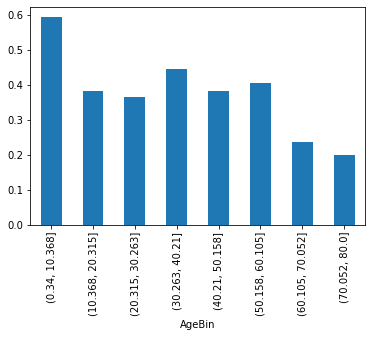

In [90]:
age_df.groupby(["AgeBin"])["Survived"].mean().plot.bar()


Young children have a higher rate of survival. Elderly have a lower rate of survival.

## Siblings, Spouses and Parents

In [91]:
df.groupby(["SibSp"])["Survived"].mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

<AxesSubplot:xlabel='SibSp', ylabel='Survival Rate'>

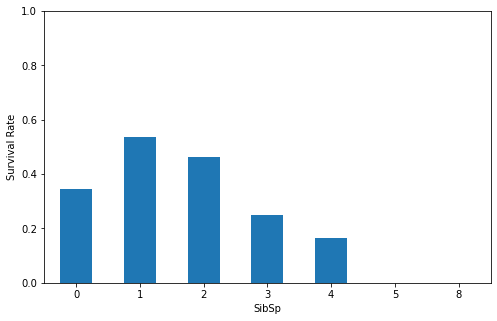

In [93]:
df.groupby(["SibSp"])["Survived"].mean().plot.bar(rot=0, figsize=(8,5), ylim=(0,1), ylabel="Survival Rate")


In [94]:
df.groupby(["Parch"])["Survived"].mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Parch', ylabel='Survival Rate'>

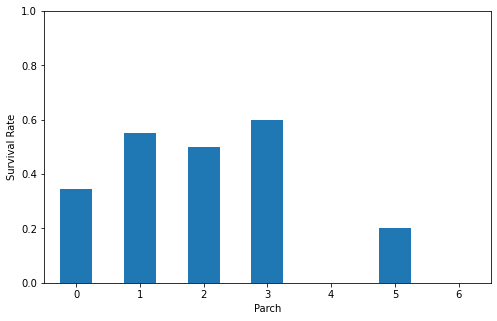

In [96]:
df.groupby(["Parch"])["Survived"].mean().plot.bar(rot=0, figsize=(8,5), ylim=(0,1), ylabel="Survival Rate")
